#Практическая работа № 4

###Дисперсионный анализ

###Библиотеки

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored


ModuleNotFoundError: No module named 'termcolor'

### Подключаем google drive

In [ ]:
alpha = 0.05
df = pd.read_csv('winemag-data_first150k.csv', sheet_name='Sheet1')
df

###Данные

####Загрузка данных с google drive

####Для проверки предпосылок, лежащих в основе дисперсионного анализа, разобьём наш дата сет на 4 группы по критерию Design

In [3]:
x1 = df[df["Design"] == 0]
x2 = df[df["Design"] == 1]
x3 = df[df["Design"] == 2]
x4 = df[df["Design"] == 3]
print("x1:")
print(x1)
print("x2:")
print(x2)
print("x3:")
print(x3)
print("x4:")
print(x4)
groups = np.array((x1['Distance'].values,
                   x2['Distance'].values,
                   x3['Distance'].values,
                   x4['Distance'].  values))
df = pd.DataFrame(groups.T, columns=['0', '1', '2', '3'])

NameError: name 'df' is not defined

###Проверка предпосылок, лежащих в основе дисперсионного анализа

 - нормальное распределение значений изучаемого признака 
 - однородность дисперсий в каждой группе

#### Проверка гипотезы о нормальности распределения значений изучаемого признака

In [22]:
alpha = 0.05
_, p = scipy.stats.shapiro(x1['Distance'])
if p >= alpha:
    print(colored('Нулевая гипотеза принимается', 'green'))
else:
    print(colored('Нулевая гипотеза отвергается', 'red'))

_, p = scipy.stats.shapiro(x2['Distance'])
if p >= alpha:
    print(colored('Нулевая гипотеза принимается', 'green'))
else:
    print(colored('Нулевая гипотеза отвергается', 'red'))

_, p = scipy.stats.shapiro(x3['Distance'])
if p >= alpha:
    print(colored('Нулевая гипотеза принимается', 'green'))
else:
    print(colored('Нулевая гипотеза отвергается', 'red'))

_, p = scipy.stats.shapiro(x4['Distance'])
if p >= alpha:
    print(colored('Нулевая гипотеза принимается', 'green'))
else:
    print(colored('Нулевая гипотеза отвергается', 'red'))

Нулевая гипотеза принимается
Нулевая гипотеза принимается
Нулевая гипотеза принимается
Нулевая гипотеза принимается


#### Проверка гипотезы об однородности дисперсий

In [23]:
_, p = scipy.stats.levene(x1['Distance'], x2['Distance'], x3['Distance'], x4['Distance'])
print(p)
alpha = 0.05
if p >= alpha:
    print(colored('Гипотеза об однородности дисперсий принимается', 'green'))
else:
    print(colored('Гипотеза об однородности дисперсий отвергается', 'red'))

0.11827579172462642
Гипотеза об однородности дисперсий принимается


###Дисперсионный анализ

####Проверка гипотезы о равенстве средних 

In [24]:
_, p = scipy.stats.f_oneway(x1['Distance'], x2['Distance'], x3['Distance'], x4['Distance'])
print(f'p-value: {p:.20f}')

alpha = 0.05

if p >= alpha:
    print(colored('Гипотеза о равенстве средних принимается', 'green'))
else:
    print(colored('Гипотеза о равенстве средних отвергается', 'red'))

p-value: 0.00000000000027319908
Гипотеза о равенстве средних отвергается


####Определим как группы различаются между собой используя критерий Тьюки


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   11.902  0.001  6.6795 17.1245   True
     0      2   19.974  0.001 14.7515 25.1965   True
     0      3   22.008  0.001 16.7855 27.2305   True
     1      2    8.072  0.001  2.8495 13.2945   True
     1      3   10.106  0.001  4.8835 15.3285   True
     2      3    2.034 0.7007 -3.1885  7.2565  False
----------------------------------------------------


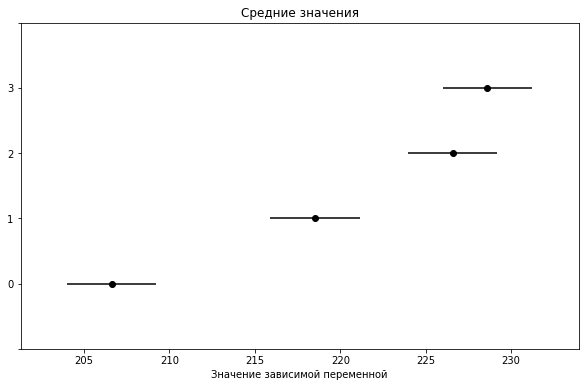

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=dataframe['Distance'],
                          groups=dataframe['Design'],
                          alpha=0.05)
print(tukey)
fig = tukey.plot_simultaneous(xlabel='Значение зависимой переменной')
fig.get_axes()[0].title.set_text('Средние значения')

В полученной таблице приведены результаты попарной проверки гипотез о равенстве средних. 

Для пары Design3 Design4 гипотеза о равенстве средних принимается, а для остальных пар отвергается.

####График доверительных интервалов разностей

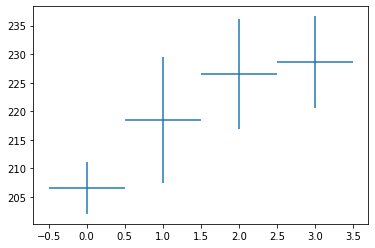

In [26]:
mean = dataframe.groupby('Design')['Distance'].mean()
std = dataframe.groupby('Design')['Distance'].std()

plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')
plt.show()

####Параллельные диаграммы размаха

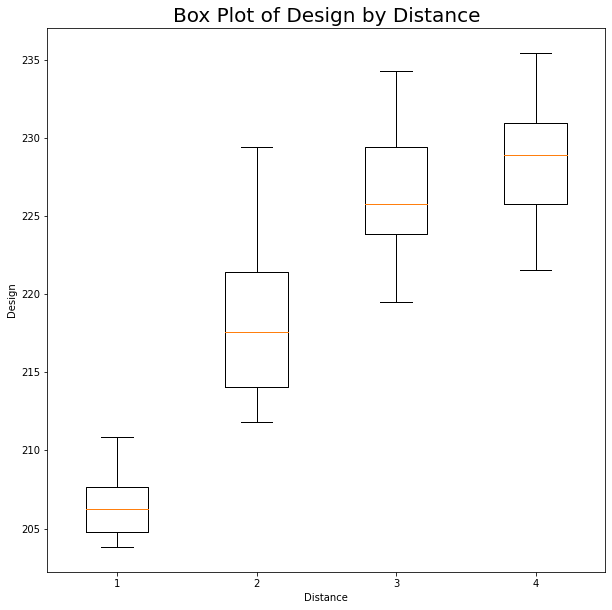

In [27]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Design by Distance", fontsize= 20)
ax.set
data = [x1['Distance'],
        x2['Distance'],
        x3['Distance'],
        x4['Distance']]

ax.boxplot(data)

plt.xlabel("Distance")
plt.ylabel("Design")

plt.show()